In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzhemir-data/Alzheimer_s Dataset/test/ModerateDemented/30.jpg
/kaggle/input/alzhemir-data/Alzheimer_s Dataset/test/ModerateDemented/29.jpg
/kaggle/input/alzhemir-data/Alzheimer_s Dataset/test/ModerateDemented/28.jpg
/kaggle/input/alzhemir-data/Alzheimer_s Dataset/test/ModerateDemented/32 (2).jpg
/kaggle/input/alzhemir-data/Alzheimer_s Dataset/test/ModerateDemented/27 (2).jpg
/kaggle/input/alzhemir-data/Alzheimer_s Dataset/test/ModerateDemented/31.jpg
/kaggle/input/alzhemir-data/Alzheimer_s Dataset/test/ModerateDemented/32.jpg
/kaggle/input/alzhemir-data/Alzheimer_s Dataset/test/ModerateDemented/30 (2).jpg
/kaggle/input/alzhemir-data/Alzheimer_s Dataset/test/ModerateDemented/29 (2).jpg
/kaggle/input/alzhemir-data/Alzheimer_s Dataset/test/ModerateDemented/27.jpg
/kaggle/input/alzhemir-data/Alzheimer_s Dataset/test/ModerateDemented/28 (2).jpg
/kaggle/input/alzhemir-data/Alzheimer_s Dataset/test/ModerateDemented/31 (2).jpg
/kaggle/input/alzhemir-data/Alzheimer_s Dataset/test

In [2]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam

2024-05-09 11:24:17.527815: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 11:24:17.527929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 11:24:17.809658: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
! nvidia-smi

Thu May  9 11:24:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define training and validation data directories
train_dir = "/kaggle/input/alzhemir-data/Alzheimer_s Dataset/train"
test_dir = "/kaggle/input/alzhemir-data/Alzheimer_s Dataset/test"



# Set image dimensions 
img_width, img_height = 150, 150

# Use data generators to load images and labels 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="categorical"
)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
class_len = 4
from tensorflow.keras.layers import Reshape
import time

## CNN (GPU)

In [6]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Define image dimensions
img_width, img_height = 150, 150

# Define CNN model
model = Sequential([
  # Input layer for the image 
  keras.layers.Input(shape=(img_height, img_width, 3)),

  # Feature extraction with CNN blocks
  Conv2D(16, (3, 3), activation='relu', padding='same'),
  MaxPooling2D(pool_size=(2, 2)),
  Conv2D(32, (3, 3), activation='relu', padding='same'),
  MaxPooling2D(pool_size=(2, 2)),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  MaxPooling2D(pool_size=(2, 2)),

  # Flatten the features before dense layers
  Flatten(),

  # Dense layers with activation for classification (adapt class_len to your data)
  Dense(128, activation='relu'),
  Dense(class_len, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




In [7]:
time_list_c = []
accuracy_list_c = []
val_accuracy_list_c = []
loss_list_c = []
val_loss_list_c = []
# Train the model
for epoch in range(20):
    start_time_c = time.time()
    history_c = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=1,
                        validation_data=test_generator, validation_steps=len(test_generator))
    end_time_c = time.time()
    epoch_time_c = end_time_c - start_time_c    # Append epoch time to the list
    time_list_c.append(epoch_time_c)
    accuracy_list_c.append(history_c.history['accuracy'][0])
    val_accuracy_list_c.append(history_c.history['val_accuracy'][0])
    loss_list_c.append(history_c.history['loss'][0])
    val_loss_list_c.append(history_c.history['val_loss'][0])


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/161 ━━━━━━━━━━━━━━━━━━━━ 30:16 11s/step - accuracy: 0.0312 - loss: 1.4139

I0000 00:00:1715253888.722831     124 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715253888.742678     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


160/161 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.4600 - loss: 1.0972

W0000 00:00:1715253944.673027     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


161/161 ━━━━━━━━━━━━━━━━━━━━ 77s 409ms/step - accuracy: 0.4605 - loss: 1.0964 - val_accuracy: 0.5113 - val_loss: 0.9636
161/161 ━━━━━━━━━━━━━━━━━━━━ 35s 208ms/step - accuracy: 0.5578 - loss: 0.9299 - val_accuracy: 0.5356 - val_loss: 0.9444
161/161 ━━━━━━━━━━━━━━━━━━━━ 35s 211ms/step - accuracy: 0.5861 - loss: 0.8918 - val_accuracy: 0.5285 - val_loss: 0.9564
161/161 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.6022 - loss: 0.8474 - val_accuracy: 0.5434 - val_loss: 0.9690
161/161 ━━━━━━━━━━━━━━━━━━━━ 36s 214ms/step - accuracy: 0.6035 - loss: 0.8178 - val_accuracy: 0.5528 - val_loss: 0.9627
161/161 ━━━━━━━━━━━━━━━━━━━━ 35s 207ms/step - accuracy: 0.6544 - loss: 0.7561 - val_accuracy: 0.5637 - val_loss: 0.9106
161/161 ━━━━━━━━━━━━━━━━━━━━ 35s 207ms/step - accuracy: 0.6632 - loss: 0.7075 - val_accuracy: 0.5700 - val_loss: 1.0144
161/161 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.6963 - loss: 0.6545 - val_accuracy: 0.5426 - val_loss: 1.0323
161/161 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/s

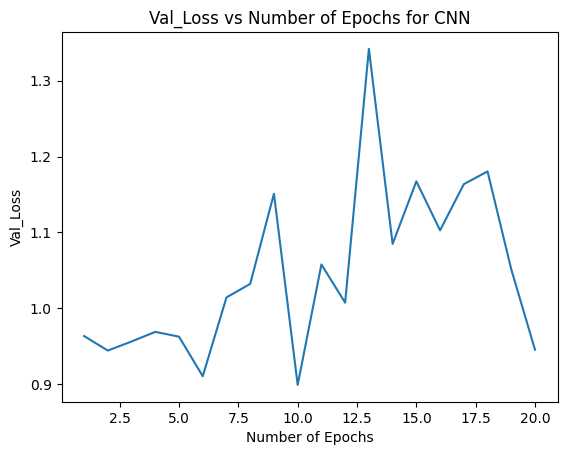

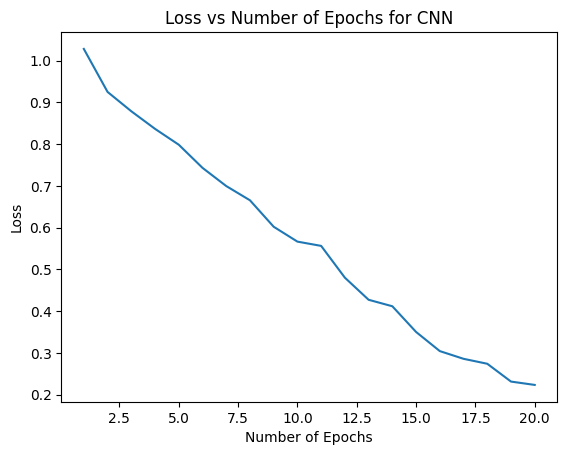

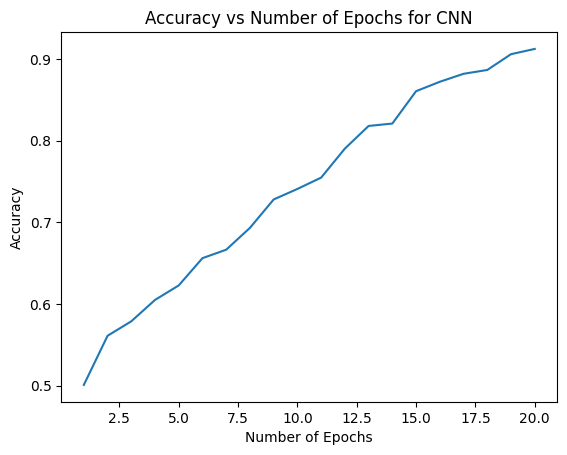

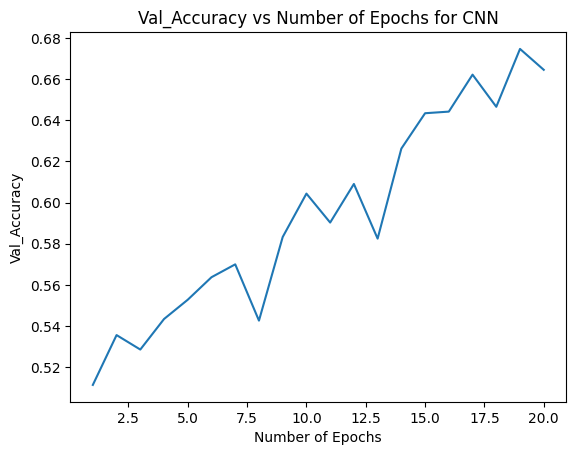

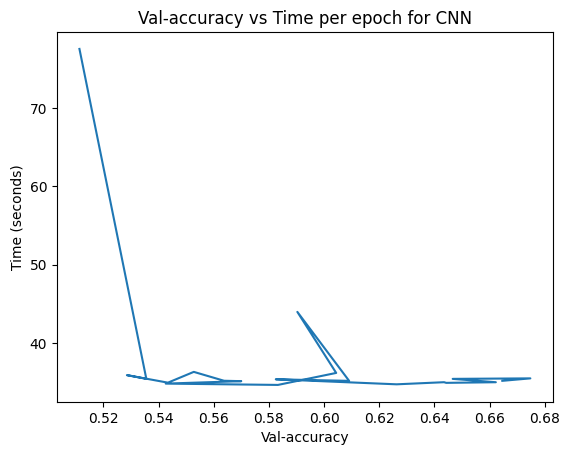

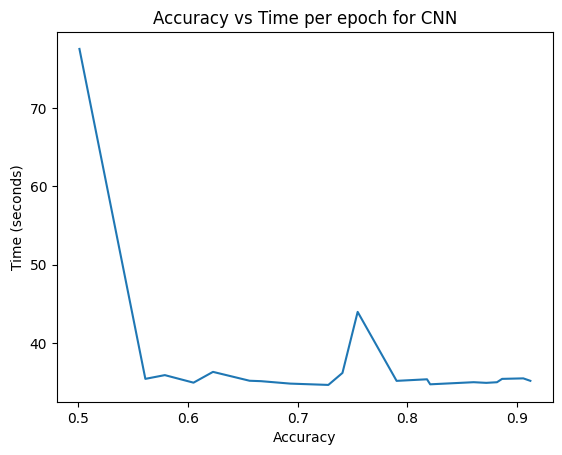

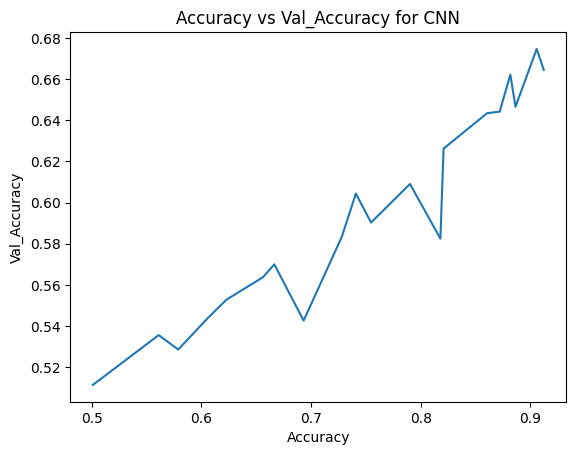

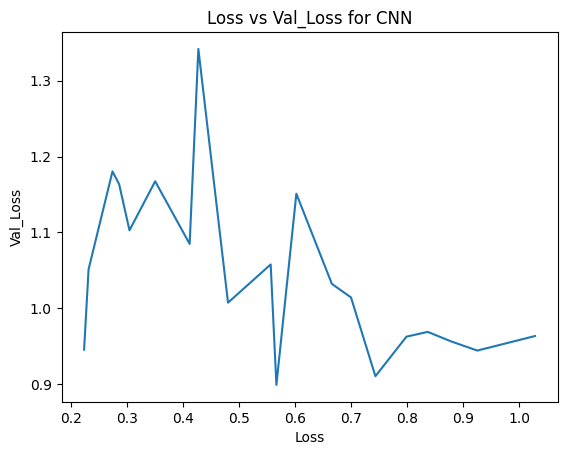

In [8]:
# INDIVIDUAL GRAPHS FOR CNN

plt.plot(range(1, len(val_loss_list_c) + 1), val_loss_list_c, label='GPU')
plt.title('Val_Loss vs Number of Epochs for CNN')
plt.ylabel('Val_Loss')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(range(1, len(loss_list_c) + 1), loss_list_c, label='GPU')
plt.title('Loss vs Number of Epochs for CNN')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(range(1, len(accuracy_list_c) + 1), accuracy_list_c, label='GPU')
plt.title('Accuracy vs Number of Epochs for CNN')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(range(1, len(val_accuracy_list_c) + 1), val_accuracy_list_c, label='GPU')
plt.title('Val_Accuracy vs Number of Epochs for CNN')
plt.ylabel('Val_Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

# -----------------------------------------
plt.plot(val_accuracy_list_c, time_list_c, label='GPU')
plt.title('Val-accuracy vs Time per epoch for CNN')
plt.ylabel('Time (seconds)')
plt.xlabel('Val-accuracy')
plt.show()

plt.plot(accuracy_list_c, time_list_c, label='GPU')
plt.title('Accuracy vs Time per epoch for CNN')
plt.ylabel('Time (seconds)')
plt.xlabel('Accuracy')
plt.show()

plt.plot(accuracy_list_c, val_accuracy_list_c, label='GPU')
plt.title('Accuracy vs Val_Accuracy for CNN')
plt.xlabel('Accuracy')
plt.ylabel('Val_Accuracy')
plt.show()

plt.plot(loss_list_c, val_loss_list_c, label='GPU')
plt.title('Loss vs Val_Loss for CNN')
plt.xlabel('Loss')
plt.ylabel('Val_Loss')
plt.show()

## VGG (on GPU)

In [9]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers on top
model_g = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')  # Assuming 4 output classes, change accordingly
])

# Compile the model
model_g.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
time_list_g = []
accuracy_list_g = []
val_accuracy_list_g = []
loss_list_g = []
val_loss_list_g = []
# Train the model
for epoch in range(20):
    start_time_g = time.time()
    history_g = model_g.fit(train_generator, steps_per_epoch=len(train_generator), epochs=1,
                        validation_data=test_generator, validation_steps=len(test_generator))
    end_time_g = time.time()
    epoch_time_g = end_time_g - start_time_g    # Append epoch time to the list
    time_list_g.append(epoch_time_g)
    accuracy_list_g.append(history_g.history['accuracy'][0])
    val_accuracy_list_g.append(history_g.history['val_accuracy'][0])
    loss_list_g.append(history_g.history['loss'][0])
    val_loss_list_g.append(history_g.history['val_loss'][0])

  2/161 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.3672 - loss: 3.5235 

W0000 00:00:1715254657.070609     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.4816 - loss: 1.5469

W0000 00:00:1715254692.647033     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


161/161 ━━━━━━━━━━━━━━━━━━━━ 75s 340ms/step - accuracy: 0.4818 - loss: 1.5441 - val_accuracy: 0.5395 - val_loss: 1.0761


W0000 00:00:1715254711.433961     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


161/161 ━━━━━━━━━━━━━━━━━━━━ 36s 215ms/step - accuracy: 0.5999 - loss: 0.8653 - val_accuracy: 0.5778 - val_loss: 0.9403
161/161 ━━━━━━━━━━━━━━━━━━━━ 36s 213ms/step - accuracy: 0.6303 - loss: 0.7968 - val_accuracy: 0.5567 - val_loss: 1.0370
161/161 ━━━━━━━━━━━━━━━━━━━━ 36s 214ms/step - accuracy: 0.6407 - loss: 0.8020 - val_accuracy: 0.5786 - val_loss: 0.9016
161/161 ━━━━━━━━━━━━━━━━━━━━ 36s 214ms/step - accuracy: 0.6480 - loss: 0.7627 - val_accuracy: 0.6005 - val_loss: 0.8969
161/161 ━━━━━━━━━━━━━━━━━━━━ 35s 211ms/step - accuracy: 0.6709 - loss: 0.7314 - val_accuracy: 0.6286 - val_loss: 0.8741
161/161 ━━━━━━━━━━━━━━━━━━━━ 36s 215ms/step - accuracy: 0.7003 - loss: 0.7102 - val_accuracy: 0.6005 - val_loss: 0.9442
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 220ms/step - accuracy: 0.7000 - loss: 0.6683 - val_accuracy: 0.6036 - val_loss: 0.9761
161/161 ━━━━━━━━━━━━━━━━━━━━ 36s 216ms/step - accuracy: 0.6557 - loss: 0.7512 - val_accuracy: 0.6271 - val_loss: 0.8655
161/161 ━━━━━━━━━━━━━━━━━━━━ 36s 215ms/s

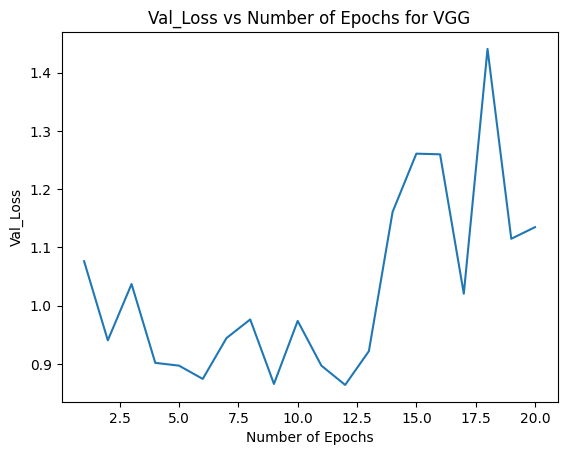

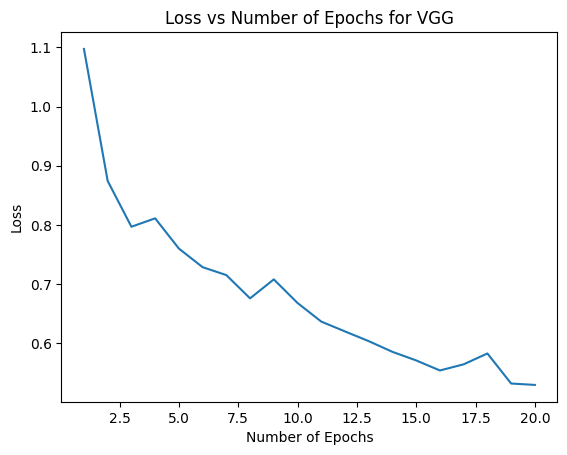

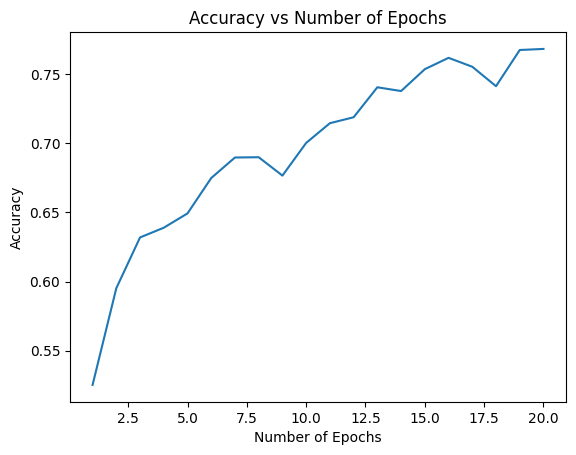

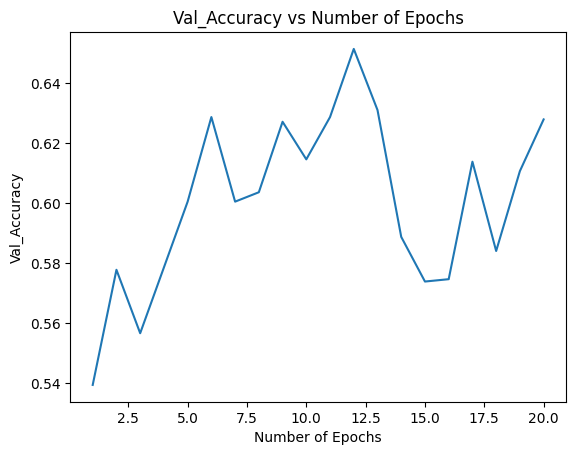

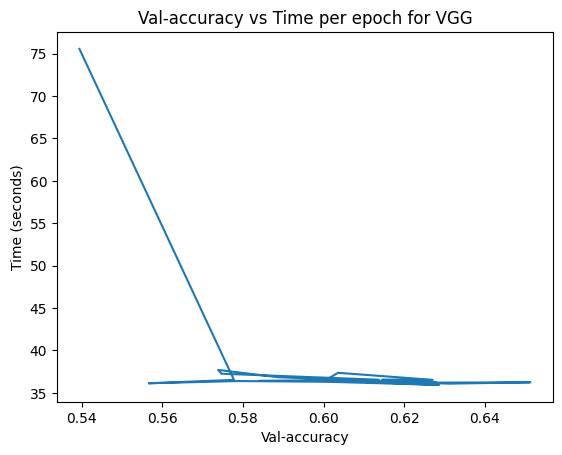

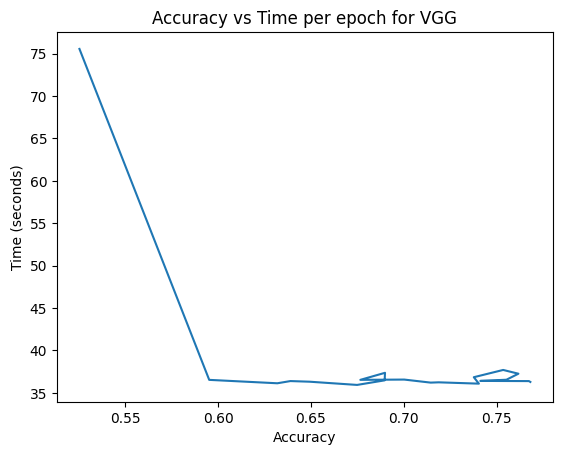

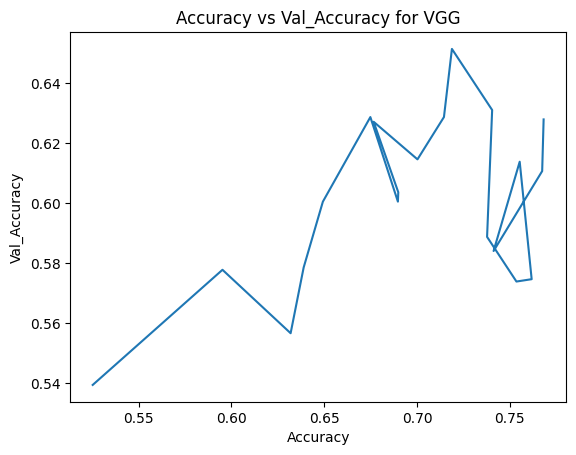

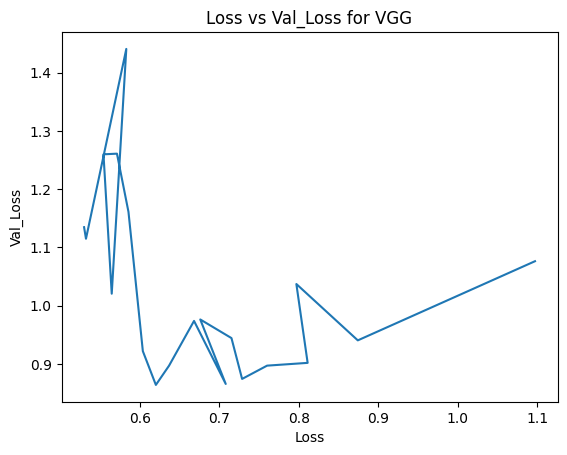

In [11]:
# INDIVIDUAL GRAPHS FOR VGG


plt.plot(range(1, len(val_loss_list_g) + 1), val_loss_list_g, label='GPU')
plt.title('Val_Loss vs Number of Epochs for VGG')
plt.ylabel('Val_Loss')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(range(1, len(loss_list_g) + 1), loss_list_g, label='GPU')
plt.title('Loss vs Number of Epochs for VGG')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(range(1, len(accuracy_list_g) + 1), accuracy_list_g, label='GPU')
plt.title('Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(range(1, len(val_accuracy_list_g) + 1), val_accuracy_list_g, label='GPU')
plt.title('Val_Accuracy vs Number of Epochs')
plt.ylabel('Val_Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

# -----------------------------------------
plt.plot(val_accuracy_list_g, time_list_g, label='GPU')
plt.title('Val-accuracy vs Time per epoch for VGG')
plt.ylabel('Time (seconds)')
plt.xlabel('Val-accuracy')
plt.show()

plt.plot(accuracy_list_g, time_list_g, label='GPU')
plt.title('Accuracy vs Time per epoch for VGG')
plt.ylabel('Time (seconds)')
plt.xlabel('Accuracy')
plt.show()

plt.plot(accuracy_list_g, val_accuracy_list_g, label='GPU')
plt.title('Accuracy vs Val_Accuracy for VGG')
plt.xlabel('Accuracy')
plt.ylabel('Val_Accuracy')
plt.show()

plt.plot(loss_list_g, val_loss_list_g, label='GPU')
plt.title('Loss vs Val_Loss for VGG')
plt.xlabel('Loss')
plt.ylabel('Val_Loss')
plt.show()

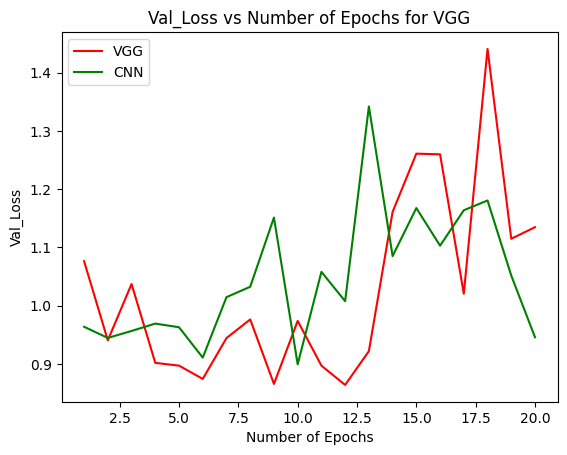

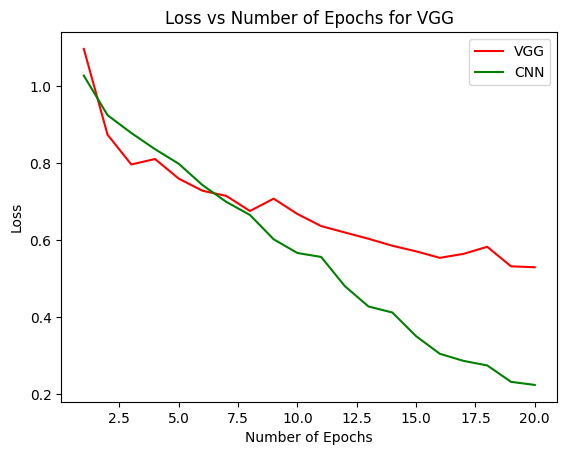

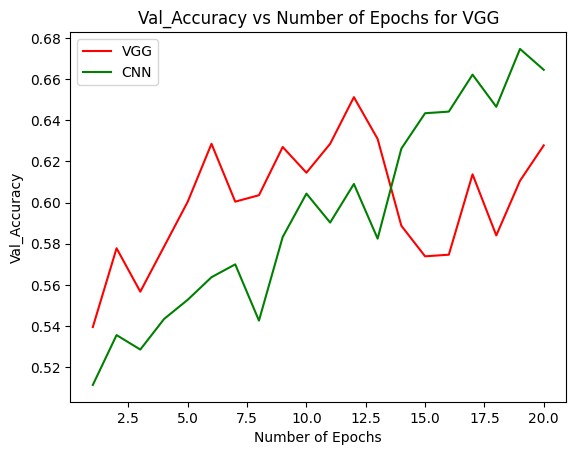

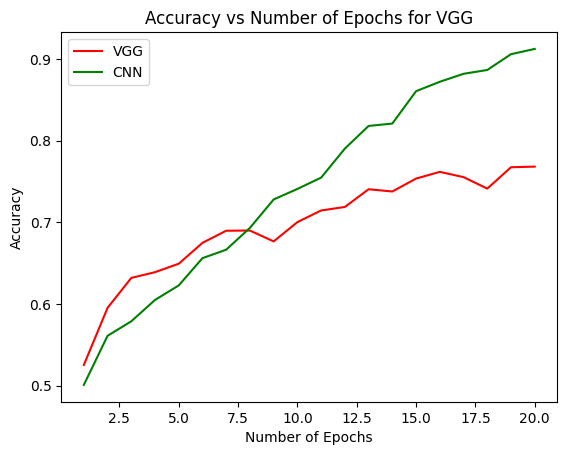

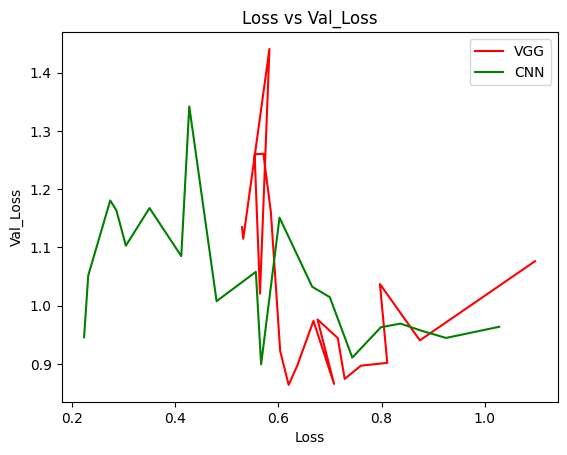

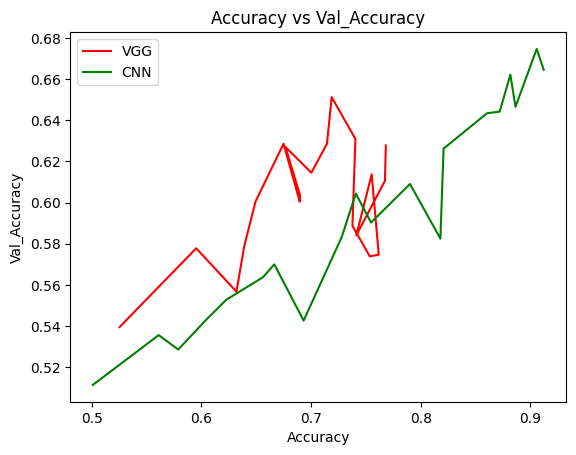

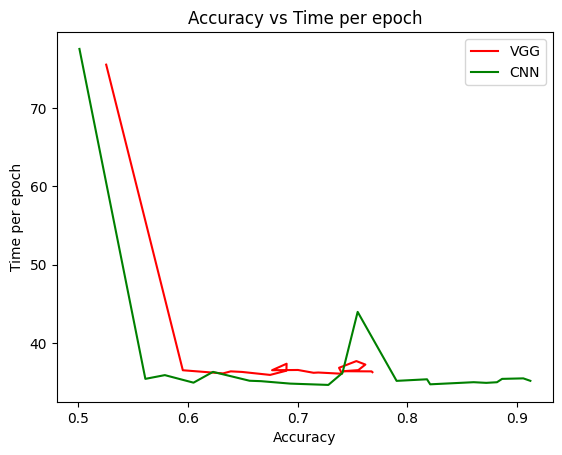

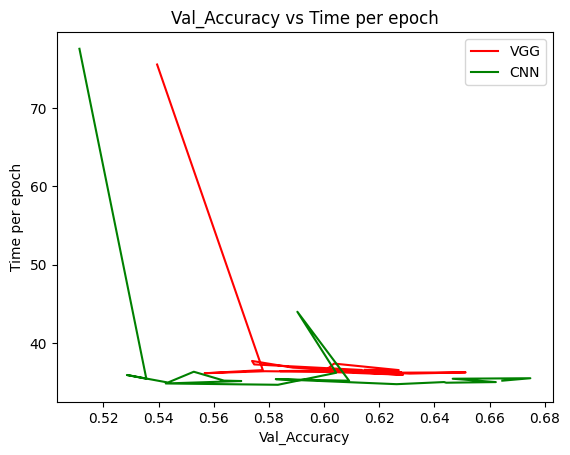

In [12]:
# COMPARATIVE GRAPHS FOR CNN AND VGG

# combined graph
plt.plot(range(1, len(val_loss_list_g) + 1), val_loss_list_g, color='r', label='VGG')
plt.plot(range(1, len(val_loss_list_c) + 1), val_loss_list_c, color='g', label='CNN')
plt.title('Val_Loss vs Number of Epochs for VGG')
plt.ylabel('Val_Loss')
plt.xlabel('Number of Epochs')
plt.legend()
plt.show()


plt.plot(range(1, len(loss_list_g) + 1), loss_list_g, color='r', label='VGG')
plt.plot(range(1, len(loss_list_c) + 1), loss_list_c, color='g', label='CNN')
plt.title('Loss vs Number of Epochs for VGG')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend()
plt.show()

plt.plot(range(1, len(val_accuracy_list_g) + 1), val_accuracy_list_g, color='r', label='VGG')
plt.plot(range(1, len(val_accuracy_list_c) + 1), val_accuracy_list_c, color='g', label='CNN')
plt.title('Val_Accuracy vs Number of Epochs for VGG')
plt.ylabel('Val_Accuracy')
plt.xlabel('Number of Epochs')
plt.legend()
plt.show()

plt.plot(range(1, len(accuracy_list_g) + 1), accuracy_list_g, color='r', label='VGG')
plt.plot(range(1, len(accuracy_list_c) + 1), accuracy_list_c, color='g', label='CNN')
plt.title('Accuracy vs Number of Epochs for VGG')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend()
plt.show()

# -----------

plt.plot(loss_list_g, val_loss_list_g, color='r', label='VGG')
plt.plot(loss_list_c, val_loss_list_c, color='g', label='CNN')
plt.title('Loss vs Val_Loss')
plt.xlabel('Loss')
plt.ylabel('Val_Loss')
plt.legend()
plt.show()

plt.plot(accuracy_list_g, val_accuracy_list_g, color='r', label='VGG')
plt.plot(accuracy_list_c, val_accuracy_list_c, color='g', label='CNN')
plt.title('Accuracy vs Val_Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Val_Accuracy')
plt.legend()
plt.show()

plt.plot(accuracy_list_g, time_list_g, color='r', label='VGG')
plt.plot(accuracy_list_c, time_list_c, color='g', label='CNN')
plt.title('Accuracy vs Time per epoch')
plt.xlabel('Accuracy')
plt.ylabel('Time per epoch')
plt.legend()
plt.show()

plt.plot(val_accuracy_list_g, time_list_g, color='r', label='VGG')
plt.plot(val_accuracy_list_c, time_list_c, color='g', label='CNN')
plt.title('Val_Accuracy vs Time per epoch')
plt.xlabel('Val_Accuracy')
plt.ylabel('Time per epoch')
plt.legend()
plt.show()

## NASNET

In [13]:
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define NASNet model
base_nasnet = NASNetLarge(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
x = GlobalAveragePooling2D()(base_nasnet.output)
output_nasnet = Dense(4, activation='softmax')(x)
nasnet_model = Model(inputs=base_nasnet.input, outputs=output_nasnet)

343610240/343610240 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
nasnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
accuracy_list_n = []
val_accuracy_list_n = []
loss_list_n = []
val_loss_list_n = []
time_list_n=[]

for epoch in range(2):
    start_time_n  = time.time()
    nasnet_history = nasnet_model.fit(train_generator, epochs=10, validation_data=test_generator)
    end_time_n = time.time()
    epoch_time_n =  end_time_n - start_time_n
    time_list_n.append(epoch_time_n)
    accuracy_list_n.append(nasnet_history.history['accuracy'][0])
    val_accuracy_list_n.append(nasnet_history.history['val_accuracy'][0])
    loss_list_n.append(nasnet_history.history['loss'][0])
    val_loss_list_n.append(nasnet_history.history['val_loss'][0])

Epoch 1/10


W0000 00:00:1715255818.059695     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5208 - loss: 1.0175

W0000 00:00:1715256152.003880     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


161/161 ━━━━━━━━━━━━━━━━━━━━ 759s 2s/step - accuracy: 0.5210 - loss: 1.0169 - val_accuracy: 0.5004 - val_loss: 548.8286
Epoch 2/10


W0000 00:00:1715256177.607372     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


161/161 ━━━━━━━━━━━━━━━━━━━━ 114s 697ms/step - accuracy: 0.6399 - loss: 0.7815 - val_accuracy: 0.1400 - val_loss: 22956.8516
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 113s 693ms/step - accuracy: 0.6707 - loss: 0.7571 - val_accuracy: 0.5004 - val_loss: 425129.3438
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 113s 695ms/step - accuracy: 0.7210 - loss: 0.6597 - val_accuracy: 0.5004 - val_loss: 947794.4375
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 143s 697ms/step - accuracy: 0.7628 - loss: 0.5975 - val_accuracy: 0.1400 - val_loss: 129483.1875
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 113s 693ms/step - accuracy: 0.8152 - loss: 0.4564 - val_accuracy: 0.1400 - val_loss: 75292.0547
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 115s 706ms/step - accuracy: 0.8659 - loss: 0.3718 - val_accuracy: 0.5004 - val_loss: 53983.5195
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 114s 696ms/step - accuracy: 0.8580 - loss: 0.3729 - val_accuracy: 0.5004 - val_loss: 81047.5234
Epoch 9/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 113s 697ms/step 

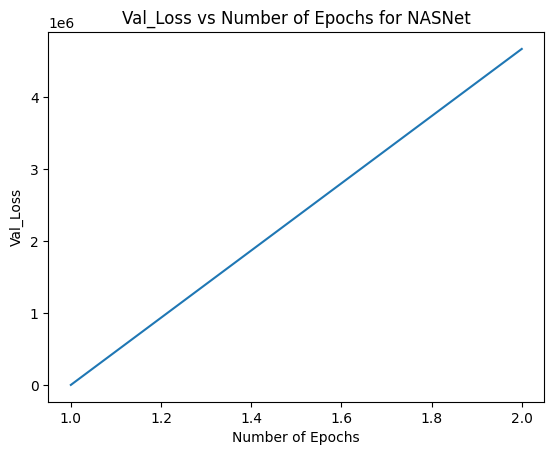

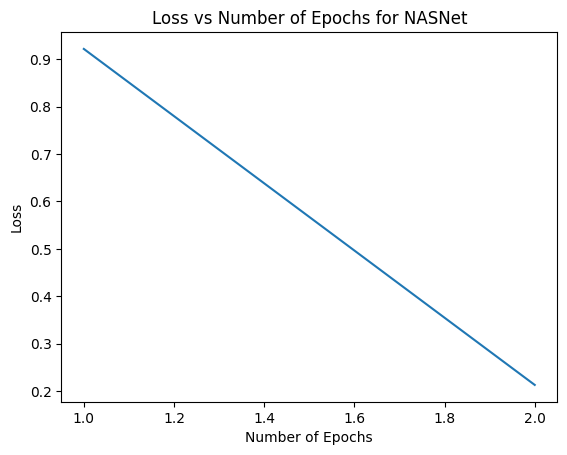

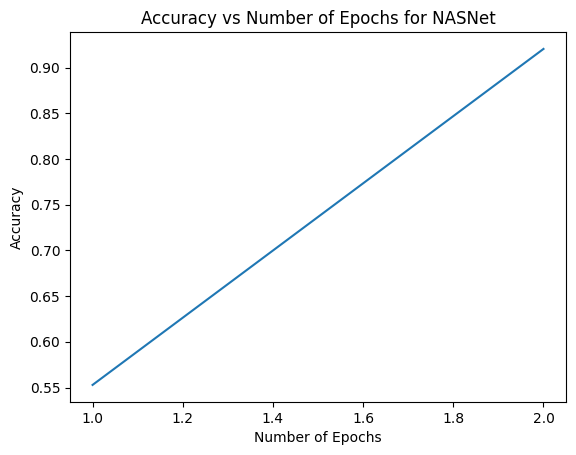

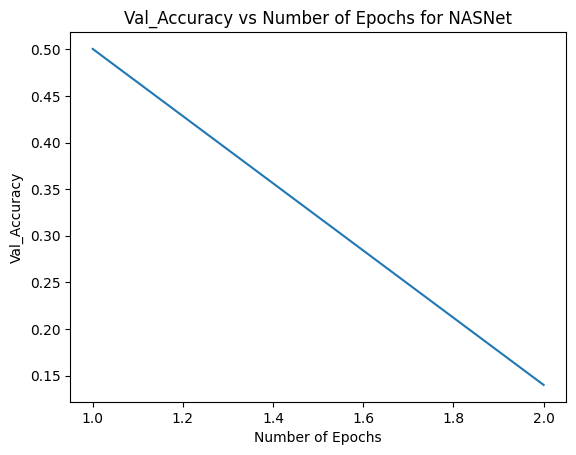

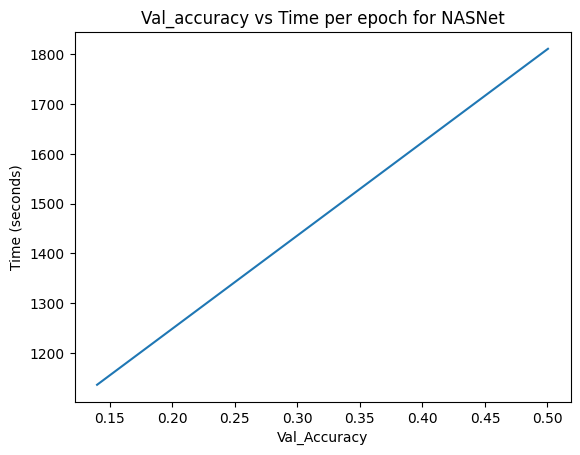

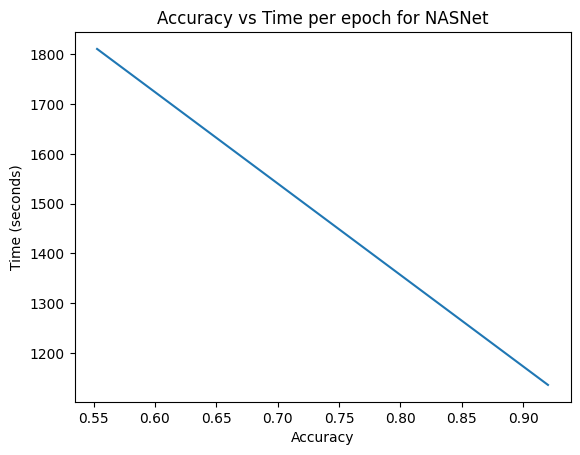

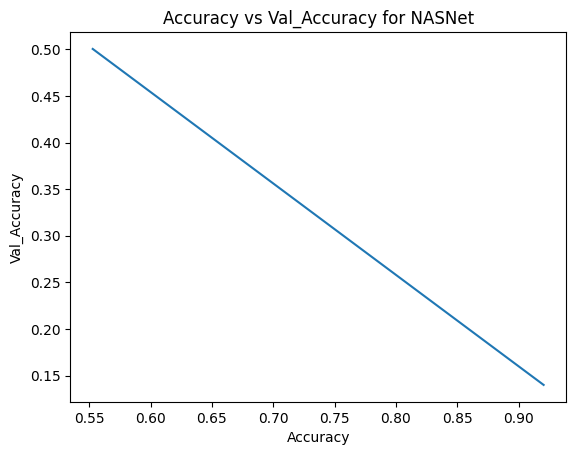

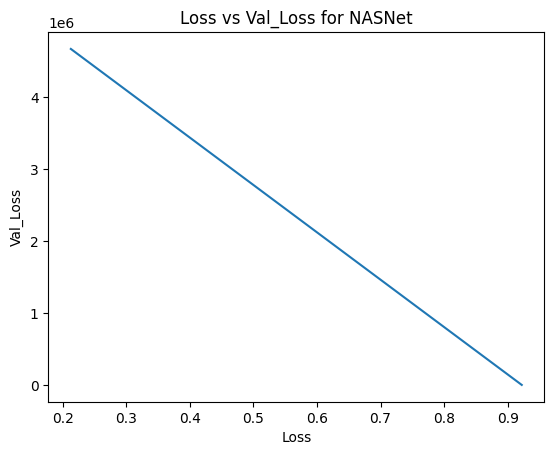

In [15]:
# INDIVIDUAL GRAPHS FOR NASNet
plt.plot(range(1, len(val_loss_list_n) + 1), val_loss_list_n, label='GPU')
plt.title('Val_Loss vs Number of Epochs for NASNet')
plt.ylabel('Val_Loss')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(range(1, len(loss_list_n) + 1), loss_list_n, label='GPU')
plt.title('Loss vs Number of Epochs for NASNet')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(range(1, len(accuracy_list_n) + 1), accuracy_list_n, label='GPU')
plt.title('Accuracy vs Number of Epochs for NASNet')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(range(1, len(val_accuracy_list_n) + 1), val_accuracy_list_n, label='GPU')
plt.title('Val_Accuracy vs Number of Epochs for NASNet')
plt.ylabel('Val_Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

# -----------------------------------------
plt.plot(val_accuracy_list_n, time_list_n, label='GPU')
plt.title('Val_accuracy vs Time per epoch for NASNet')
plt.ylabel('Time (seconds)')
plt.xlabel('Val_Accuracy')
plt.show()

plt.plot(accuracy_list_n, time_list_n, label='GPU')
plt.title('Accuracy vs Time per epoch for NASNet')
plt.ylabel('Time (seconds)')
plt.xlabel('Accuracy')
plt.show()

plt.plot(accuracy_list_n, val_accuracy_list_n, label='GPU')
plt.title('Accuracy vs Val_Accuracy for NASNet')
plt.xlabel('Accuracy')
plt.ylabel('Val_Accuracy')
plt.show()

plt.plot(loss_list_n, val_loss_list_n, label='GPU')
plt.title('Loss vs Val_Loss for NASNet')
plt.xlabel('Loss')
plt.ylabel('Val_Loss')
plt.show()

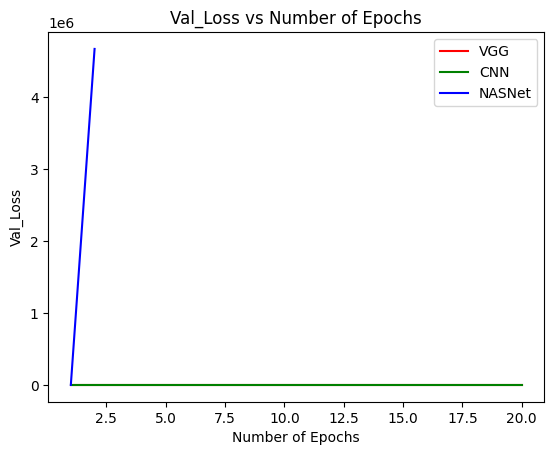

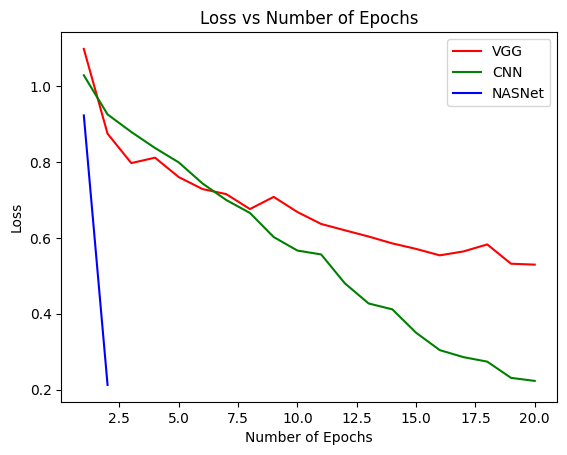

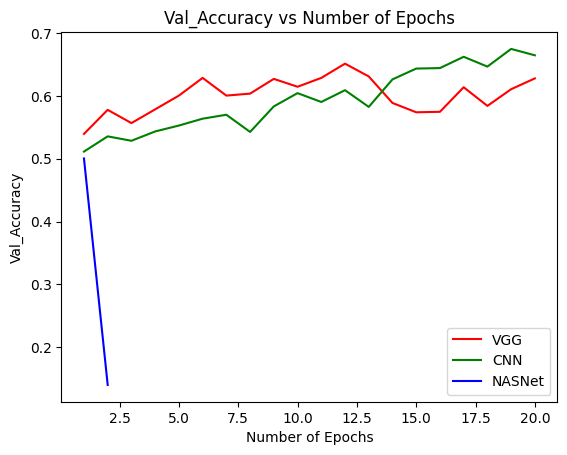

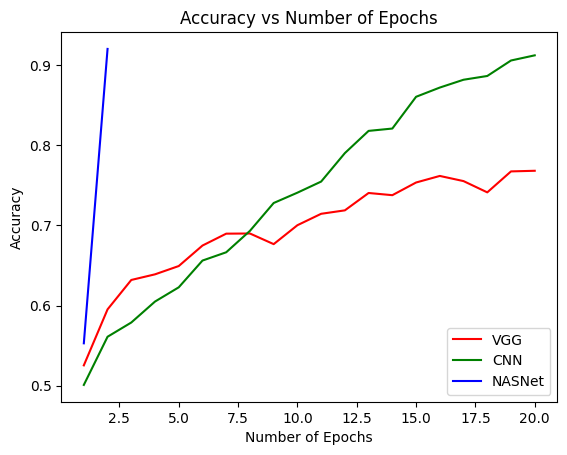

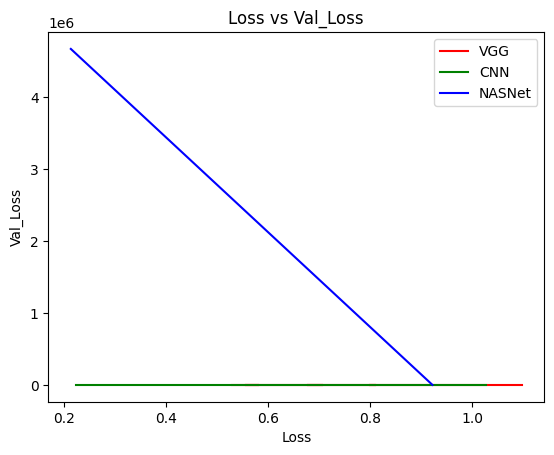

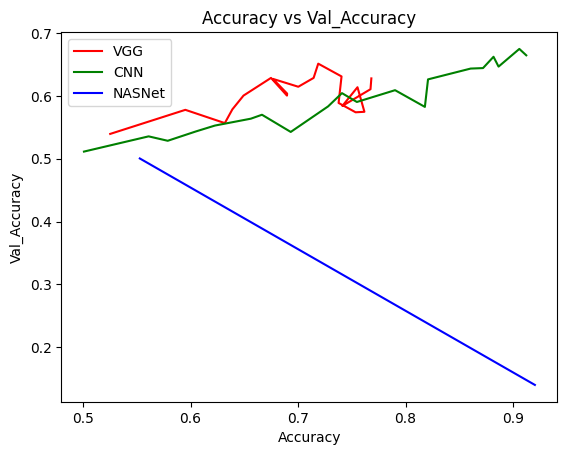

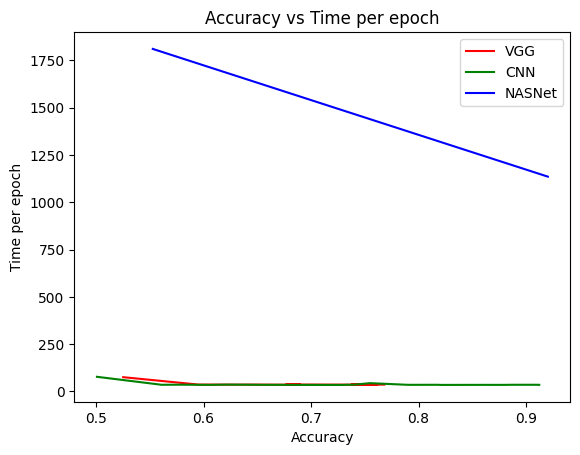

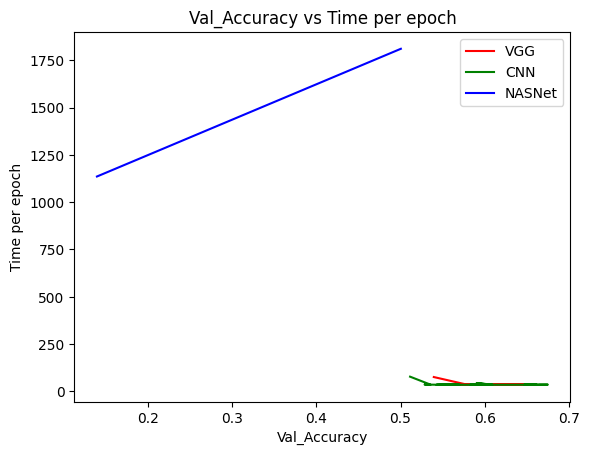

In [17]:
# COMPARATIVE GRAPHS FOR ALL MODELS

plt.plot(range(1, len(val_loss_list_g) + 1), val_loss_list_g, color='r', label='VGG')
plt.plot(range(1, len(val_loss_list_c) + 1), val_loss_list_c, color='g', label='CNN')
plt.plot(range(1, len(val_loss_list_n) + 1), val_loss_list_n, color='b', label='NASNet')
plt.title('Val_Loss vs Number of Epochs')
plt.ylabel('Val_Loss')
plt.xlabel('Number of Epochs')
plt.legend()
plt.show()

plt.plot(range(1, len(loss_list_g) + 1), loss_list_g, color='r', label='VGG')
plt.plot(range(1, len(loss_list_c) + 1), loss_list_c, color='g', label='CNN')
plt.plot(range(1, len(loss_list_n) + 1), loss_list_n, color='b', label='NASNet')
plt.title('Loss vs Number of Epochs')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend()
plt.show()

plt.plot(range(1, len(val_accuracy_list_g) + 1), val_accuracy_list_g, color='r', label='VGG')
plt.plot(range(1, len(val_accuracy_list_c) + 1), val_accuracy_list_c, color='g', label='CNN')
plt.plot(range(1, len(val_accuracy_list_n) + 1), val_accuracy_list_n, color='b', label='NASNet')
plt.title('Val_Accuracy vs Number of Epochs')
plt.ylabel('Val_Accuracy')
plt.xlabel('Number of Epochs')
plt.legend()
plt.show()

plt.plot(range(1, len(accuracy_list_g) + 1), accuracy_list_g, color='r', label='VGG')
plt.plot(range(1, len(accuracy_list_c) + 1), accuracy_list_c, color='g', label='CNN')
plt.plot(range(1, len(accuracy_list_n) + 1), accuracy_list_n, color='b', label='NASNet')
plt.title('Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend()
plt.show()


plt.plot(loss_list_g, val_loss_list_g, color='r', label='VGG')
plt.plot(loss_list_c, val_loss_list_c, color='g', label='CNN')
plt.plot(loss_list_n, val_loss_list_n, color='b', label='NASNet')
plt.title('Loss vs Val_Loss')
plt.xlabel('Loss')
plt.ylabel('Val_Loss')
plt.legend()
plt.show()

plt.plot(accuracy_list_g, val_accuracy_list_g, color='r', label='VGG')
plt.plot(accuracy_list_c, val_accuracy_list_c, color='g', label='CNN')
plt.plot(accuracy_list_n, val_accuracy_list_n, color='b', label='NASNet')
plt.title('Accuracy vs Val_Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Val_Accuracy')
plt.legend()
plt.show()

plt.plot(accuracy_list_g, time_list_g, color='r', label='VGG')
plt.plot(accuracy_list_c, time_list_c, color='g', label='CNN')
plt.plot(accuracy_list_n, time_list_n, color='b', label='NASNet')
plt.title('Accuracy vs Time per epoch')
plt.xlabel('Accuracy')
plt.ylabel('Time per epoch')
plt.legend()
plt.show()

plt.plot(val_accuracy_list_g, time_list_g, color='r', label='VGG')
plt.plot(val_accuracy_list_c, time_list_c, color='g', label='CNN')
plt.plot(val_accuracy_list_n, time_list_n, color='b', label='NASNet')
plt.title('Val_Accuracy vs Time per epoch')
plt.xlabel('Val_Accuracy')
plt.ylabel('Time per epoch')
plt.legend()
plt.show()